In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Whatever dipricated warning you can get while executing code will not be coming
import warnings
warnings.filterwarnings("ignore")

In [2]:
salary = [11, 40, 45, 68, 65, 68, 78, 90, 57, 74, 91, 92, 88, 68, 57, 48, 99, 101, 68, 77, 110, 140]

In [3]:
# Five point samary: 
# min, 25th, 50th, 75th, 100th percentile

In [4]:
np.quantile(salary, [0,0.25,0.50,0.75,1])

array([ 11.  ,  59.  ,  71.  ,  90.75, 140.  ])

In [5]:
df = pd.DataFrame(salary, columns = ['salary'])
df

,salary
0,11
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74


In [6]:
df.describe()

,salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


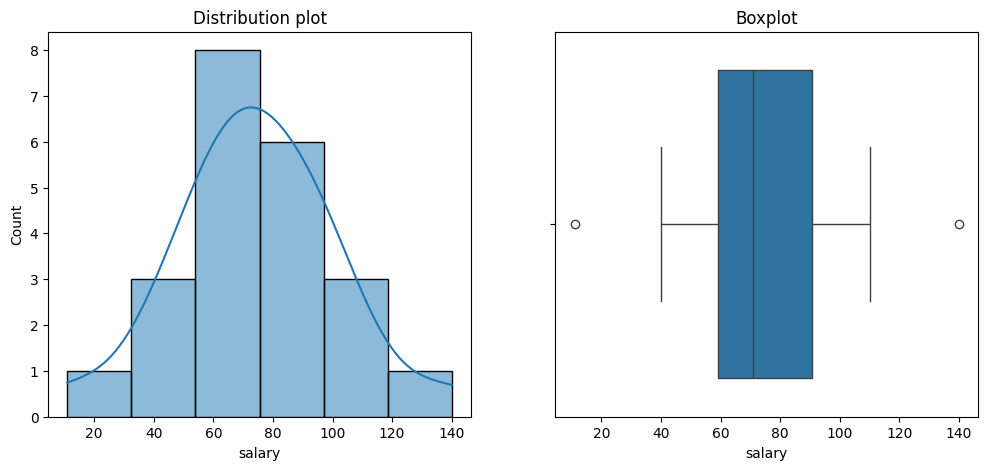

In [7]:
# To check outliers: distplot, boxplot
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['salary'], kde = True)
plt.title("Distribution plot")

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'salary')
plt.title("Boxplot")
plt.show()

In [8]:
# The destribution is not skewed as outlier iare present both sides
# In boxplot there are outlier
# droping the outliers
# capping the outliers
# replacing the outliers by mean or median

In [9]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)

IQR = Q3-Q1

lower_fance = Q1-1.5*IQR
upper_fance = Q3+1.5*IQR

In [11]:
df_filtered = df[(df.salary>=lower_fance) & (df.salary<=upper_fance)]

In [12]:
df_filtered

,salary
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74
10,91


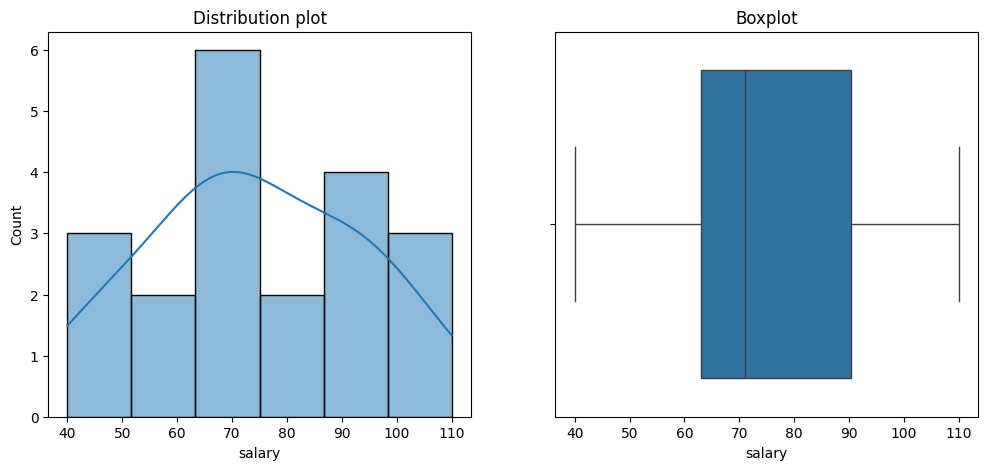

In [13]:
# To check outliers: distplot, boxplot
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df_filtered['salary'], kde = True)
plt.title("Distribution plot")

plt.subplot(1,2,2)
sns.boxplot(data = df_filtered, x = 'salary')
plt.title("Boxplot")
plt.show()

In [15]:
# imputation with mean and median
df['Salary_impuuted_mean'] = np.where((df.salary>upper_fance) | (df.salary<=lower_fance), df['salary'].mean(), df['salary'])

In [16]:
df

,salary,Salary_impuuted_mean
0,11,74.318182
1,40,40.000000
2,45,45.000000
3,68,68.000000
4,65,65.000000
5,68,68.000000
6,78,78.000000
7,90,90.000000
8,57,57.000000
9,74,74.000000


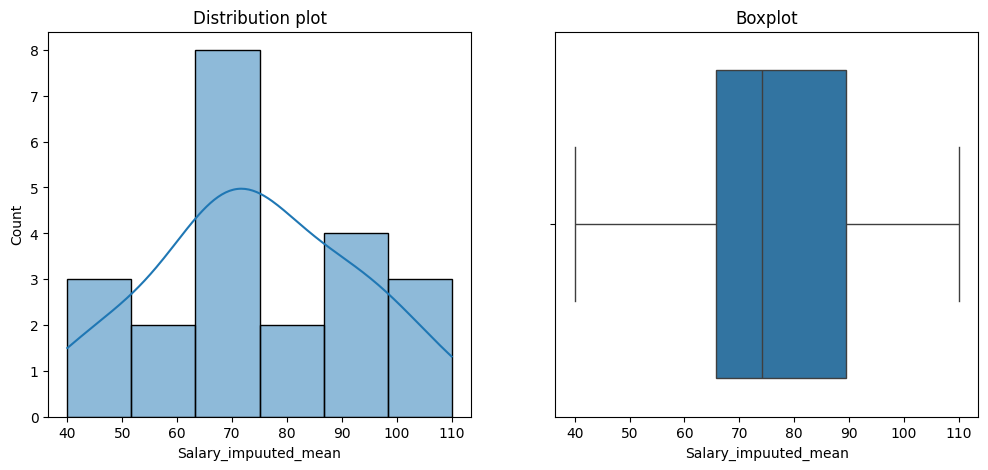

In [17]:
# To check outliers: distplot, boxplot
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['Salary_impuuted_mean'], kde = True)
plt.title("Distribution plot")

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'Salary_impuuted_mean')
plt.title("Boxplot")
plt.show()

In [18]:
# imputation with mean and median
df['Salary_impuuted_median'] = np.where((df.salary>upper_fance) | (df.salary<=lower_fance), df['salary'].median(), df['salary'])

In [19]:
df

,salary,Salary_impuuted_mean,Salary_impuuted_median
0,11,74.318182,71.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


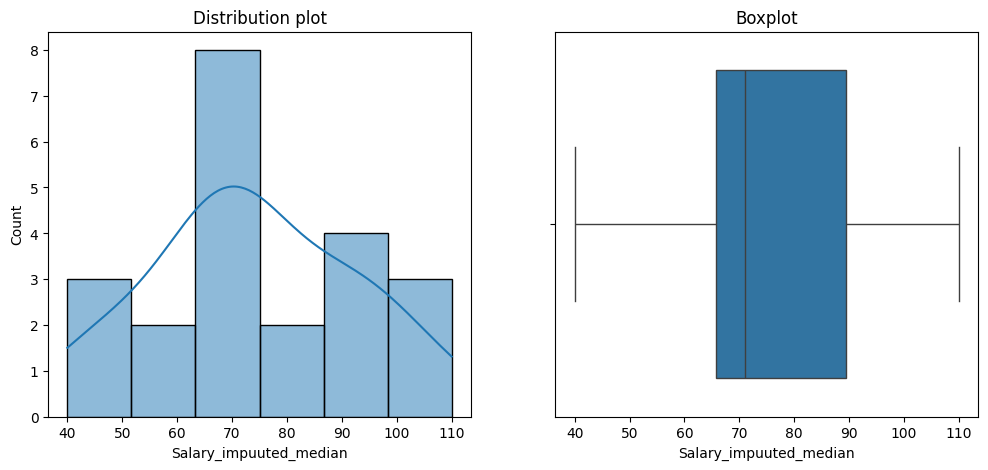

In [20]:
# To check outliers: distplot, boxplot
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['Salary_impuuted_median'], kde = True)
plt.title("Distribution plot")

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'Salary_impuuted_median')
plt.title("Boxplot")
plt.show()

In [21]:
# Capping the outliers
# Replacing nearest value which is not outlier
lower_cap = df['salary'].quantile(0.05)
upper_cap = df['salary'].quantile(0.95)

In [26]:
# Replace outliers with cap
#replace outliers with cap
# where(condition, [x, y], /)
# Return elements chosen from `x` or `y` depending on `condition`.
#if df['Salary'] < lower_cap satisfied then lower_cap and df['Salary']>upper_cap satisfied then upper_cap
#otherwise keep Salary as it is


df["Salary_capped"] = np.where(df['salary'] < lower_cap, lower_cap,
        np.where(df['salary']>upper_cap, upper_cap, df['salary']))

In [23]:
df

,salary,Salary_impuuted_mean,Salary_impuuted_median
0,11,74.318182,71.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


In [27]:
df

,salary,Salary_impuuted_mean,Salary_impuuted_median,Salary_capped
0,11,74.318182,71.0,40.25
1,40,40.000000,40.0,40.25
2,45,45.000000,45.0,45.00
3,68,68.000000,68.0,68.00
4,65,65.000000,65.0,65.00
5,68,68.000000,68.0,68.00
6,78,78.000000,78.0,78.00
7,90,90.000000,90.0,90.00
8,57,57.000000,57.0,57.00
9,74,74.000000,74.0,74.00


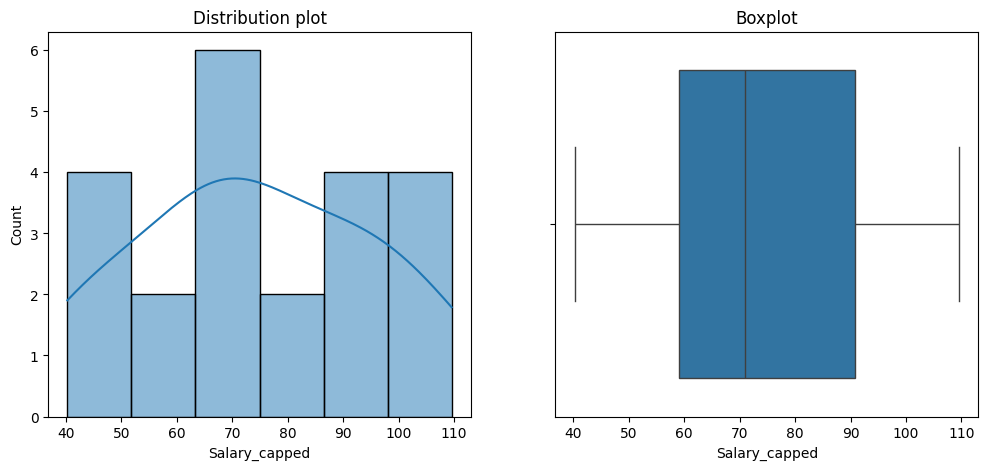

In [28]:
# To check outliers: distplot, boxplot
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['Salary_capped'], kde = True)
plt.title("Distribution plot")

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'Salary_capped')
plt.title("Boxplot")
plt.show()